In [3]:
import re
import nltk
import numpy as np
from matplotlib import pylab as plt

s_doc_word = np.load("p2_data/science2k-doc-word.npy")
s_word_doc = np.load("p2_data/science2k-word-doc.npy")
s_titles = None
s_vocab = None

with open('p2_data/science2k-titles.txt') as f:
    s_titles = f.readlines()
with open('p2_data/science2k-vocab.txt') as f:
    s_vocab = f.readlines()

print('science2k-doc-word shape: {0}'.format(s_doc_word.shape))
print('science2k-word-doc shape: {0}'.format(s_word_doc.shape))

s_titles = np.array(s_titles)
s_vocab = np.array(s_vocab)

science2k-doc-word shape: (1373, 5476)
science2k-word-doc shape: (5476, 1373)


In [4]:
"""
Part 2.A
"""
from sklearn.cluster import KMeans

xvals = []
yvals = []
kmeans_arr = []

for k in range(2,21):
    print('Calculating k-means for k={0}'.format(k))
    xvals.append(k)
    kmeans = KMeans(n_clusters=k).fit(s_doc_word)
    kmeans_arr.append(kmeans)
    yvals.append(kmeans.inertia_)

Calculating k-means for k=2
Calculating k-means for k=3
Calculating k-means for k=4
Calculating k-means for k=5
Calculating k-means for k=6
Calculating k-means for k=7
Calculating k-means for k=8
Calculating k-means for k=9
Calculating k-means for k=10
Calculating k-means for k=11
Calculating k-means for k=12
Calculating k-means for k=13
Calculating k-means for k=14
Calculating k-means for k=15
Calculating k-means for k=16
Calculating k-means for k=17
Calculating k-means for k=18
Calculating k-means for k=19
Calculating k-means for k=20


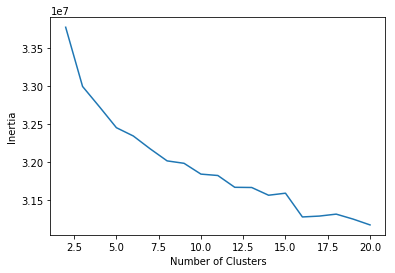

In [5]:
plt.clf()
plt.plot(xvals, yvals)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
def get_docs_words_from_center(center, center_label, data, data_labels, docs):
    data_subset = []
    for i in range(len(data)):
        if data_labels[i] == center_label:
            data_subset.append((np.linalg.norm(center - data[i]), i))
    data_subset.sort(key=lambda t: t[0])
    
    ret = []
    set_used = s_titles if docs else s_vocab
    for i in range(10):
        ret.append(set_used[data_subset[i][1]])
    return ret

km = kmeans_arr[3]
print('Selecting k as {0}'.format(len(km.cluster_centers_)))

avg_x_docword = s_doc_word.mean(0)
cluster_index = 0
for center in km.cluster_centers_:
    dif = center - avg_x_docword
    dif_tuples = []
    for ind in range(len(dif)):
        dif_tuples.append((dif[ind], ind))
    dif_tuples.sort(key=lambda t: t[0], reverse=True)
    
    print('\r\nTop words for cluster {0}:'.format(cluster_index))
    for i in range(10):
        word = s_vocab[dif_tuples[i][1]]
        print(word)
    
    print('\r\nClosest docs for cluster {0}:'.format(cluster_index))
    docs = get_docs_words_from_center(center, cluster_index, s_doc_word, km.labels_, True)
    for d in docs:
        print(d)
        
    cluster_index += 1


Selecting k as 5

Top words for cluster 0:
global

estimates

values

range

years

period

north

estimate

average

fig


Closest docs for cluster 0:
"Greenland Ice Sheet: High-Elevation Balance and Peripheral Thinning"

"Isotopic Evidence for Variations in the Marine Calcium Cycle over the Cenozoic"

"Mass Balance of the Greenland Ice Sheet at High Elevations"

"Rapid Kimberlite Ascent and the Significance of Ar-Ar Ages in Xenolith Phlogopites"

"The Role of the Southern Ocean in Uptake and Storage of Anthropogenic Carbon Dioxide"

"Remobilization in the Cratonic Lithosphere Recorded in Polycrystalline Diamond"

"Temporal Trends in Deep Ocean Redfield Ratios"

"Rapid Flooding of the Sunda Shelf: A Late-Glacial Sea-Level Record"

"Dynamics of the Pacific-North American Plate Boundary in the Western United States"

"Synchronous Radiocarbon and Climate Shifts during the Last Deglaciation"


Top words for cluster 1:
protein

cells

cell

expression

fig

proteins

gene

specific

expres

In [10]:
"""
Part 2.B
"""
xvals = []
yvals = []
kmeans_arr_v2 = []
for k in range(2,21):
    print('Calculating k-means for k={0}'.format(k))
    xvals.append(k)
    kmeans = KMeans(n_clusters=k).fit(s_word_doc)
    kmeans_arr_v2.append(kmeans)
    yvals.append(kmeans.inertia_)

Calculating k-means for k=2
Calculating k-means for k=3
Calculating k-means for k=4
Calculating k-means for k=5
Calculating k-means for k=6
Calculating k-means for k=7
Calculating k-means for k=8
Calculating k-means for k=9
Calculating k-means for k=10
Calculating k-means for k=11
Calculating k-means for k=12
Calculating k-means for k=13
Calculating k-means for k=14
Calculating k-means for k=15
Calculating k-means for k=16
Calculating k-means for k=17
Calculating k-means for k=18
Calculating k-means for k=19
Calculating k-means for k=20


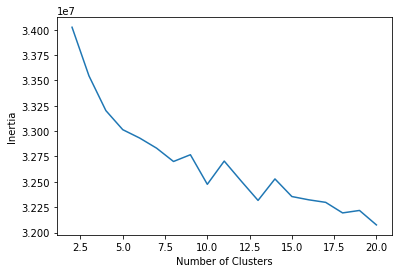

In [11]:
plt.clf()
plt.plot(xvals, yvals)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
km_v2 = kmeans_arr_v2[3]

avg_x_worddoc = s_word_doc.mean(0)
cluster_index = 0
for center in km_v2.cluster_centers_:
    dif = center - avg_x_worddoc
    dif_tuples = []
    for ind in range(len(dif)):
        dif_tuples.append((dif[ind], ind))
    dif_tuples.sort(key=lambda t: t[0], reverse=True)
    
    print('\r\nTop docs for cluster {0}:'.format(cluster_index))
    for i in range(10):
        word = s_titles[dif_tuples[i][1]]
        print(word)
        
    print('\r\nClosest words for cluster {0}'.format(cluster_index))
    words = get_docs_words_from_center(center, cluster_index, s_word_doc, km_v2.labels_, False)
    for w in words:
        print(w)
    cluster_index += 1


Top docs for cluster 0:
"Central Role for G Protein-Coupled Phosphoinositide 3-Kinase g in Inflammation"

"Comparative Genomics of the Eukaryotes"

"An Oral Vaccine against NMDAR1 with Efficacy in Experimental Stroke and Epilepsy"

"Role of the Mouse ank Gene in Control of Tissue Calcification and Arthritis"

"Kinesin Superfamily Motor Protein KIF17 and mLin-10 in NMDA Receptor-Containing Vesicle Transport"

"Function of PI3Kg in Thymocyte Development, T Cell Activation, and Neutrophil Migration"

"Noxa, a BH3-Only Member of the Bcl-2 Family and Candidate Mediator of p53-Induced Apoptosis"

"Immune Inhibitory Receptors"

"The Genome Sequence of Drosophila melanogaster"

"Positional Syntenic Cloning and Functional Characterization of the Mammalian Circadian Mutation tau"


Closest words for cluster 0
org

sciencemag

vol

myeloid

src

bcl

lacz

introns

myc

p21


Top docs for cluster 1:
"A Mouse Chronology"

"Meltdown on Long Island"

"Atom-Scale Research Gets Real"

"Presidential F